In [3]:
import sys
import os
import importlib
import logging
import pandas as pd

# =====================================================
# 1️⃣ — Source papka yo‘lini qo‘shish
# =====================================================
source_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Source"
if source_path not in sys.path:
    sys.path.append(source_path)

# =====================================================
# 2️⃣ — auto_pipeline.py ni import qilish
# =====================================================
try:
    import auto_pipeline
    importlib.reload(auto_pipeline)
    from auto_pipeline import PlayerPipeline
    print("✅ auto_pipeline.py muvaffaqiyatli import qilindi!")
except Exception as e:
    print("❌ auto_pipeline importda xatolik:", e)

# =====================================================
# 3️⃣ — Log fayl sozlamalari
# =====================================================
log_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Log\auto_pipeline.log"

logging.basicConfig(
    filename=log_path,
    filemode='a',
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

# =====================================================
# 4️⃣ — CSV fayl manzili
# =====================================================
data_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Sampling_Data\Sampling_SMOTE.csv"


# =====================================================
# 5️⃣ — CSV yuklash yordamchi funksiyasi
# =====================================================
def load_csv_safely(path):
    """Faylni xavfsiz o‘qish (agar class ichida load_csv bo‘lmasa)."""
    if not os.path.exists(path):
        raise FileNotFoundError(f"❌ Fayl topilmadi: {path}")
    df = pd.read_csv(path)
    print(f"✅ Fayl yuklandi: {path}")
    print(f"Satrlar: {len(df)}, Ustunlar: {len(df.columns)}")
    return df


# =====================================================
# 6️⃣ — Ma’lumotni yuklash
# =====================================================
try:
    logging.info("📥 Ma'lumot fayli yuklanmoqda...")

    # Agar PlayerPipeline ichida load_csv() metodi mavjud bo‘lsa, o‘shani ishlatadi
    if hasattr(PlayerPipeline, "load_csv"):
        df = PlayerPipeline.load_csv(data_path)
    else:
        df = load_csv_safely(data_path)

    logging.info(f"✅ Fayl muvaffaqiyatli yuklandi. Satrlar: {len(df)}, Ustunlar: {len(df.columns)}")

    print("\n📊 Fayl haqida umumiy ma’lumot:")
    print(df.info())

except Exception as e:
    logging.error(f"❌ Ma'lumot faylini yuklashda xatolik: {e}")
    print("❌ Xatolik:", e)


✅ auto_pipeline.py muvaffaqiyatli import qilindi!
✅ Fayl yuklandi: C:\Users\Rasulbek907\Desktop\Project_MP\Data\Sampling_Data\Sampling_SMOTE.csv
Satrlar: 13120, Ustunlar: 12

📊 Fayl haqida umumiy ma’lumot:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13120 entries, 0 to 13119
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           13120 non-null  int64  
 1   Unnamed: 0             13120 non-null  int64  
 2   name_length            13120 non-null  float64
 3   is_organic             13120 non-null  float64
 4   quantity_value         13120 non-null  float64
 5   quantity_unit_encoded  13120 non-null  float64
 6   category_depth         13120 non-null  float64
 7   country_count          13120 non-null  float64
 8   product_age_days       13120 non-null  float64
 9   created_month          13120 non-null  float64
 10  main_category_encoded  13120 non-null  float64
 11  nova

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,name_length,is_organic,quantity_value,quantity_unit_encoded,category_depth,country_count,product_age_days,created_month,main_category_encoded,nova_group
0,0,0,-0.691811,-0.121809,-1.138126,-1.013055,-0.069824,-0.588663,0.954730,0.590746,-1.202998,5
1,1,1,-1.162028,-0.121809,-0.846880,-0.425509,-1.835039,-0.180838,0.674675,0.890838,1.126987,3
2,2,2,-0.691811,-0.121809,-1.272881,0.833518,-0.364026,-0.588663,0.077223,0.890838,-1.202998,1
3,3,3,-0.221594,-0.121809,-1.277228,0.833518,-0.069824,-0.588663,1.276997,0.890838,-1.202998,1
4,4,4,-1.162028,-0.121809,-1.138126,-1.013055,-0.364026,-0.588663,-0.105422,-0.909710,-1.116914,5


In [8]:
from auto_pipeline import PlayerPipeline
from sklearn.ensemble import RandomForestClassifier

# Avto Pipeline +  RandomForestRegressor

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Ma'lumotni ajratish
X = df.drop(columns=['nova_group'])
y = df['nova_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# PlayerPipeline ni train qismi uchun ishlatamiz
pipeline_rf = PlayerPipeline(df=pd.concat([X_train, y_train], axis=1), target="nova_group", model=RandomForestClassifier(n_estimators=100, random_state=42))
pipeline_rf.fit()

# Bashorat qilish
y_pred_train = pipeline_rf.predict(X_train)
y_pred_test = pipeline_rf.predict(X_test)

# Natijalar
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("✅ Random Forest Classification natijalari")
print("-----------------------------------------")
print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test  Accuracy: {test_acc:.3f}")


✅ Random Forest Classification natijalari
-----------------------------------------
Train Accuracy: 1.000
Test  Accuracy: 0.809


In [16]:
import joblib
import os

# 📂 Model saqlanadigan joy
save_dir = r"C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models"
os.makedirs(save_dir, exist_ok=True)  # Agar papka mavjud bo‘lmasa, yaratadi

model_path = os.path.join(save_dir, "RandomForest_AUTO_Pipeline.joblib")

joblib.dump(pipeline_rf, model_path)
print(f"\n💾 Model muvaffaqiyatli saqlandi:\n➡️ {model_path}")


💾 Model muvaffaqiyatli saqlandi:
➡️ C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models\RandomForest_AUTO_Pipeline.joblib


# Avto Pipeline + DecisionTreeRegressor

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Ma'lumotni ajratish
X = df.drop(columns=['nova_group'])
y = df['nova_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# PlayerPipeline bilan model
pipeline_dt = PlayerPipeline(df=pd.concat([X_train, y_train], axis=1),
                             target="nova_group",
                             model=DecisionTreeClassifier(max_depth=None, random_state=42))

pipeline_dt.fit()

# Bashoratlar
y_pred_train = pipeline_dt.predict(X_train)
y_pred_test = pipeline_dt.predict(X_test)

# Aniqlik
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("🌳 Decision Tree Classification natijalari")
print("-----------------------------------------")
print(f"✅ Train Accuracy: {train_acc:.3f}")
print(f"✅ Test  Accuracy: {test_acc:.3f}")


🌳 Decision Tree Classification natijalari
-----------------------------------------
✅ Train Accuracy: 1.000
✅ Test  Accuracy: 0.655


In [17]:
import joblib
import os

# 📂 Model saqlanadigan joy
save_dir = r"C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models"
os.makedirs(save_dir, exist_ok=True)  # Agar papka mavjud bo‘lmasa, yaratadi

model_path = os.path.join(save_dir, "DecisionTreeClassifier_AUTO_Pipeline.joblib")

joblib.dump(pipeline_dt, model_path)
print(f"\n💾 Model muvaffaqiyatli saqlandi:\n➡️ {model_path}")


💾 Model muvaffaqiyatli saqlandi:
➡️ C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models\DecisionTreeClassifier_AUTO_Pipeline.joblib


# Avto Pipeline + LogisticRegression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Ma'lumotni ajratish
X = df.drop(columns=['nova_group'])
y = df['nova_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# PlayerPipeline bilan model
pipeline_lr = PlayerPipeline(df=pd.concat([X_train, y_train], axis=1),
                             target="nova_group",
                             model=LogisticRegression(max_iter=1000, random_state=42))

pipeline_lr.fit()

# Bashoratlar
y_pred_train = pipeline_lr.predict(X_train)
y_pred_test = pipeline_lr.predict(X_test)

# Aniqlik
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("⚙️ Logistic Regression Classification natijalari")
print("-----------------------------------------------")
print(f"✅ Train Accuracy: {train_acc:.3f}")
print(f"✅ Test  Accuracy: {test_acc:.3f}")


⚙️ Logistic Regression Classification natijalari
-----------------------------------------------
✅ Train Accuracy: 0.379
✅ Test  Accuracy: 0.368


In [18]:
import joblib
import os

# 📂 Model saqlanadigan joy
save_dir = r"C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models"
os.makedirs(save_dir, exist_ok=True)  # Agar papka mavjud bo‘lmasa, yaratadi

model_path = os.path.join(save_dir, "LogisticRegression_AUTO_Pipeline.joblib")

joblib.dump(pipeline_lr, model_path)
print(f"\n💾 Model muvaffaqiyatli saqlandi:\n➡️ {model_path}")


💾 Model muvaffaqiyatli saqlandi:
➡️ C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models\LogisticRegression_AUTO_Pipeline.joblib


# Avto Pipeline + XGBClassifier

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import pandas as pd

# Ma'lumotni ajratish
X = df.drop(columns=['nova_group'])
y = df['nova_group']

# 🔧 Klasslarni 0 dan boshlash
y = y - y.min()   # agar y = [1,2,3,4,5] bo‘lsa, endi [0,1,2,3,4] bo‘ladi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# PlayerPipeline bilan model
pipeline_xgb = PlayerPipeline(df=pd.concat([X_train, y_train], axis=1),
                              target="nova_group",
                              model=XGBClassifier(
                                  n_estimators=200,
                                  learning_rate=0.1,
                                  max_depth=6,
                                  random_state=42,
                                  use_label_encoder=False,
                                  eval_metric='mlogloss'
                              ))

pipeline_xgb.fit()

# Bashoratlar
y_pred_train = pipeline_xgb.predict(X_train)
y_pred_test = pipeline_xgb.predict(X_test)

# Aniqlik
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("🚀 XGBoost Classification natijalari")
print("-----------------------------------")
print(f"✅ Train Accuracy: {train_acc:.3f}")
print(f"✅ Test  Accuracy: {test_acc:.3f}")


c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🚀 XGBoost Classification natijalari
-----------------------------------
✅ Train Accuracy: 0.940
✅ Test  Accuracy: 0.764


In [19]:
import joblib
import os

# 📂 Model saqlanadigan joy
save_dir = r"C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models"
os.makedirs(save_dir, exist_ok=True)  # Agar papka mavjud bo‘lmasa, yaratadi

model_path = os.path.join(save_dir, "XGBClassifier_AUTO_Pipeline.joblib")

joblib.dump(pipeline_xgb, model_path)
print(f"\n💾 Model muvaffaqiyatli saqlandi:\n➡️ {model_path}")


💾 Model muvaffaqiyatli saqlandi:
➡️ C:\Users\Rasulbek907\Desktop\Project_MP\Models\Pipeline_Models\XGBClassifier_AUTO_Pipeline.joblib


# Natijalarni Taqqoslash 

📊 Model taqqoslash jadvali:
                 Model  Train Accuracy  Test Accuracy
0        Decision Tree           1.000          0.655
1        Random Forest           1.000          0.809
2  Logistic Regression           0.379          0.368
3              XGBoost           0.940          0.764


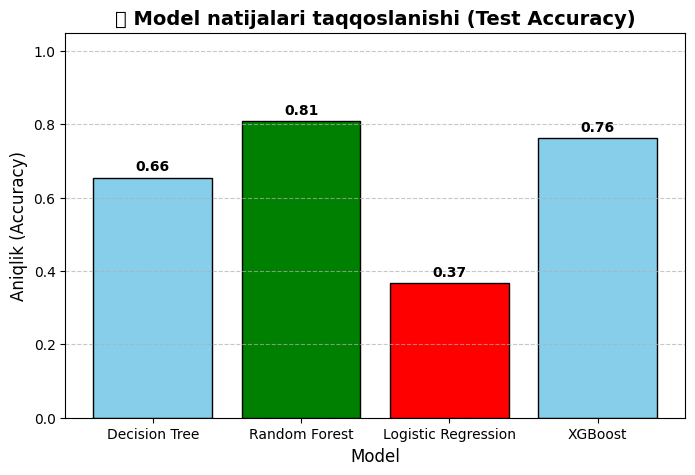

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from auto_pipeline import PlayerPipeline
import warnings
warnings.filterwarnings("ignore")

# 1️⃣ Ma'lumotni ajratish
X = df.drop(columns=['nova_group'])
y = df['nova_group']

# XGBClassifier uchun klasslarni 0 dan boshlash
y = y - y.min()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2️⃣ Modellar
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6,
                             random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

# 3️⃣ Natijalarni yig‘ish
results = []

for name, model in models.items():
    pipeline = PlayerPipeline(df=pd.concat([X_train, y_train], axis=1),
                              target="nova_group",
                              model=model)
    pipeline.fit()

    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    results.append({
        "Model": name,
        "Train Accuracy": round(train_acc, 3),
        "Test Accuracy": round(test_acc, 3)
    })

# 4️⃣ Jadval
results_df = pd.DataFrame(results)
print("📊 Model taqqoslash jadvali:")
print(results_df)

# 5️⃣ Eng yaxshi va eng yomon test aniqlikni topish
best_acc = results_df["Test Accuracy"].max()
worst_acc = results_df["Test Accuracy"].min()

# 6️⃣ Rang berish
colors = []
for acc in results_df["Test Accuracy"]:
    if acc == best_acc:
        colors.append("green")   # ✅ eng yaxshi
    elif acc == worst_acc:
        colors.append("red")     # ❌ eng yomon
    else:
        colors.append("skyblue") # ⚪ o‘rta

# 7️⃣ Vizual grafik
plt.figure(figsize=(8, 5))
bars = plt.bar(results_df["Model"], results_df["Test Accuracy"], color=colors, edgecolor='black')

# Har bir ustun ustiga qiymat yozish
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("📊 Model natijalari taqqoslanishi (Test Accuracy)", fontsize=14, weight='bold')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Aniqlik (Accuracy)", fontsize=12)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
